In [1]:
# first install imaginglss with pip from a terminal window!
# in imaginglss source code directory, run
# pip install --user -e . 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import imaginglss

In [4]:
decals = imaginglss.DECALS('/project/projectdirs/m779/imaginglss/dr2.conf.py')

In [5]:
dr = decals.datarelease

Matching 
http://legacysurvey.org/viewer/?ra=244.6758&dec=7.3071&zoom=13&layer=decals-dr2

In [6]:
from imaginglss.analysis import completeness
from imaginglss.analysis import targetselection


In [7]:
from imaginglss.utils.npyquery import Column as C

In [8]:
b = dr.brickindex.get_brick(dr.brickindex.search_by_name('2445p072'))

In [17]:
tractor = dr.catalogue.open(b)
sigma = {'r':5, 'z':5, 'g':5}
LRG = completeness.LRG(sigma)(targetselection.LRG(tractor))
QSO = completeness.QSO(sigma)(targetselection.QSO(tractor))
ELG = completeness.ELG(sigma)(targetselection.ELG(tractor))
BGS = completeness.BGS(sigma)(targetselection.BGS(tractor))

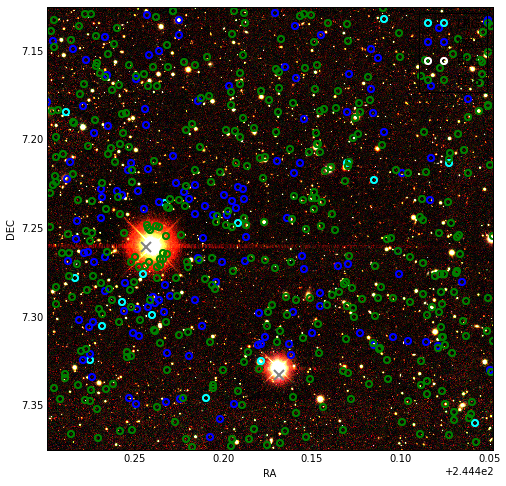

In [25]:
figure(figsize=(8, 8))
rimg = dr.images['image']['r']
gimg = dr.images['image']['g']
zimg = dr.images['image']['z']

composite = array([
        zimg.open(b).clip(0, 0.05),
        rimg.open(b).clip(0, 0.05), 
        gimg.open(b).clip(0, 0.05), 
        ]).transpose((1,2,0))
composite /= composite.max()
plot(LRG['RA'], LRG['DEC'], 'o', mfc='none', mew=2, mec='cyan', label='LRG')
plot(QSO['RA'], QSO['DEC'], 'o', mfc='none', mew=2, mec='blue', label='QSO')
plot(ELG['RA'], ELG['DEC'], 'o', mfc='none', mew=2, mec='white', label='ELG')
plot(BGS['RA'], BGS['DEC'], 'o', mfc='none', mew=2, mec='green', label='BGS')
plot(decals.tycho['RA'], decals.tycho['DEC'], 'x', markersize=10, mew=2, mfc='none', mec='gray')
imshow(composite,       
       extent=(b.ra2, b.ra1, b.dec2, b.dec1))   
xlabel('RA')
ylabel('DEC')
legend()